# Project DSC 2024 - DSC212

## 1. Tujuan dan Batasan Masalah

Tujuan :

* Mengembangkan model prediksi untuk menentukan kualitas apel berdasarkan berbagai atribut fisik dan kimiawi, seperti ukuran, berat, rasa manis, kekerasan, kadar air, kematangan, dan keasaman. Model ini diharapkan dapat membantu petani, distributor, atau pengecer dalam mengklasifikasikan apel menjadi "good" atau "bad".

Batasan masalah :

* Data Terbatas: Data yang digunakan hanya mencakup atribut-atribut tertentu dan mungkin tidak mencakup semua faktor yang mempengaruhi kualitas apel. Dan juga dapat dilihat dari dikitnya data yang ada.
* Klasifikasi Biner: Model hanya membedakan kualitas apel menjadi dua kategori: "good" dan "bad". Hal ini mungkin tidak mencerminkan variasi kualitas yang lebih kompleks.

Kriteria keberhasilan :

* Model yang dikembangkan harus mencapai akurasi prediksi yang memadai pada data validasi, yang akan diukur menggunakan metrik evaluasi.
* Hasil prediksi harus dapat diterima oleh pengguna akhir, yaitu petani, distributor, atau pengecer, dalam pengambilan keputusan terkait klasifikasi dan penanganan kualitas apel.

## 2. Pengetahuan Data

Saya menggunakan path dari raw Github User Content
1. `sample submission` : https://raw.githubusercontent.com/Obay13579/Project-DSC/main/sample_submission.csv
2. `train set`         : https://raw.githubusercontent.com/Obay13579/Project-DSC/main/train.csv
3. `test set`          : https://raw.githubusercontent.com/Obay13579/Project-DSC/main/test.csv

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import Data Training ke Dataframe


In [ ]:
url_train = "https://raw.githubusercontent.com/Obay13579/Project-DSC/main/train.csv"
train = pd.read_csv(url_train)
train.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-0.155024,-1.901167,2.615144,1.091245,1.642629,0.378677,-1.705312,good
1,1,-2.730624,-1.808060,-4.085386,0.172564,-1.579260,3.380989,-3.847081,bad
2,2,-0.599057,2.046434,-2.877662,0.505389,0.228996,1.890559,2.211756,bad
3,3,-2.010945,-1.426566,-2.334610,1.302376,0.142687,3.922959,0.017695,bad
4,4,-1.977980,-0.229483,1.283458,0.238898,1.049935,0.682324,0.369580,good


In [ ]:
!pip -q install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 89.3 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(train, title="Kualitas Apel dari Berbagai Aspek", minimal=True)
profile.to_file("report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Memvisualisasi data secara general menggunakan ydataprofiling, sehingga kita bisa mengetahui aspek-aspek penting data seperti jumlah data yang hilang, tipe data, persebaran dan lain-lain.

In [ ]:
profile

## 3. Data Preprocessing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         2800 non-null   int64  
 1   Size         2800 non-null   float64
 2   Weight       2800 non-null   float64
 3   Sweetness    2800 non-null   float64
 4   Crunchiness  2800 non-null   float64
 5   Juiciness    2800 non-null   float64
 6   Ripeness     2800 non-null   float64
 7   Acidity      2800 non-null   float64
 8   Quality      2800 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 197.0+ KB


In [ ]:
train.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Tidak ada baris data yang kosong dari masing-masing fitur yang ada diatas

In [ ]:
train.nunique()

A_id           2800
Size           2800
Weight         2800
Sweetness      2800
Crunchiness    2800
Juiciness      2800
Ripeness       2800
Acidity        2800
Quality           2
dtype: int64

Setiap fitur memiliki nilai unik, yang berarti aspek dari masing-masing apel berbeda

In [ ]:
duplicate_count = train.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


Tidak terdapat data duplikat

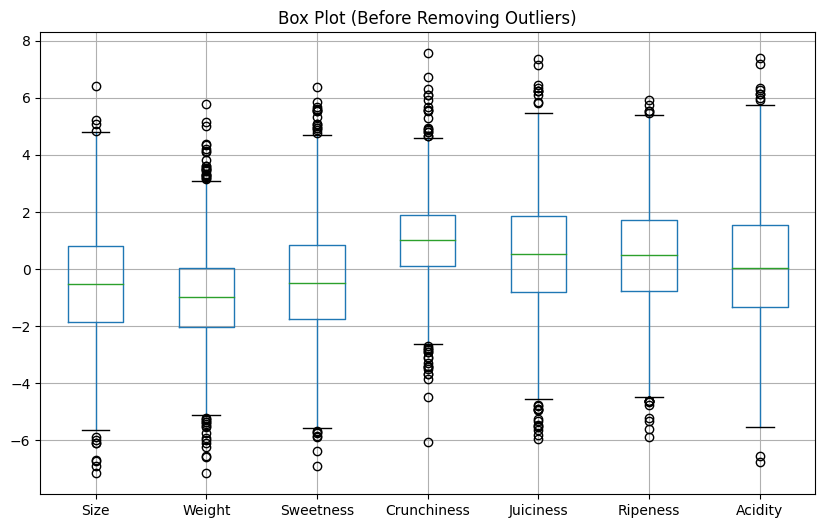

In [ ]:
plt.figure(figsize=(10, 6))
train.boxplot(column=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'])
plt.title('Box Plot (Before Removing Outliers)')
plt.show()

Seperti yang terlihat pada boxplot diatas, bahwa data `train` memiliki outliers yang kemudian dihilangkan menggunakan metode IQR (Interquartile Range)

Rows in original dataset: 2800
Rows in cleaned dataset: 2650
Number of rows removed: 150


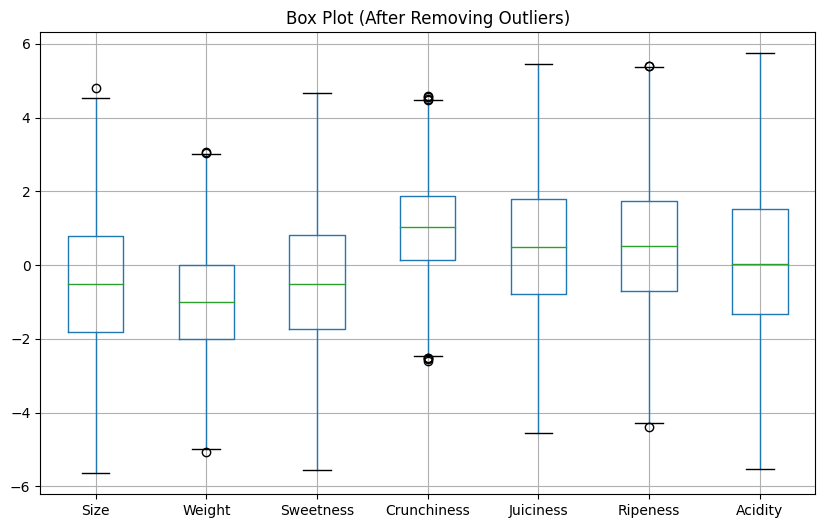

In [ ]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean

columns_to_check = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

train_clean = remove_outliers_iqr(train, columns_to_check)

print(f"Rows in original dataset: {len(train)}")
print(f"Rows in cleaned dataset: {len(train_clean)}")
print(f"Number of rows removed: {len(train) - len(train_clean)}")

plt.figure(figsize=(10, 6))
train_clean.boxplot(column=columns_to_check)
plt.title('Box Plot (After Removing Outliers)')
plt.show()

Bisa dilihat dari visualisasi boxplot setelah menghilangkan outliers menggunakan metode IQR mayoritas outliers dapat dihilangkan, namun tersisa beberapa outliers yang tidak dapat dihilangkan oleh metode IQR ini, dan hal tersebut merupakan fenomena yang lazim.

* Kenapa saya menggunakan metode IQR adalah, karena diantara metode lain yang saya coba, metode IQR ini hanya menghilangkan outliers yang sangat merugikan saat akan melakukan analisis lanjutan.

* Terdapat metode lain yang dapat menghilangkan semua outliers, namun dapat membuat korelasi antar fitur menjadi lebih lemah, maka dari itu saya memilih metode IQR ini.

## 4. Exploratory Data Analysis (EDA)

### Sebelum Outliers Dihilangkan

Distribusi Data Kategorikal

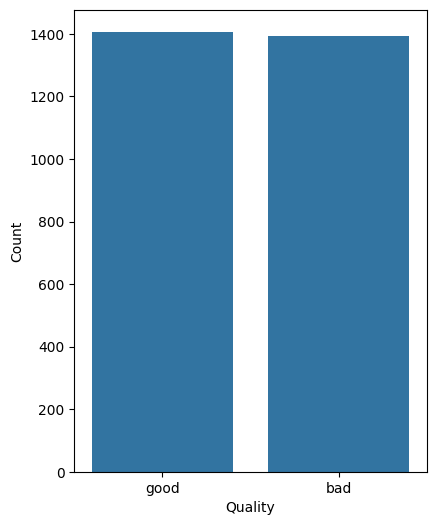

In [ ]:
plt.figure(figsize = (10, 6))
n = 0
for cols in ['Quality']:
    n += 1
    plt.subplot(1 , 2 , n)
    sns.countplot(x=cols, data=train)
    plt.ylabel('Count' if n == 1 else '')
plt.show()

Distribusi Data Numerikal


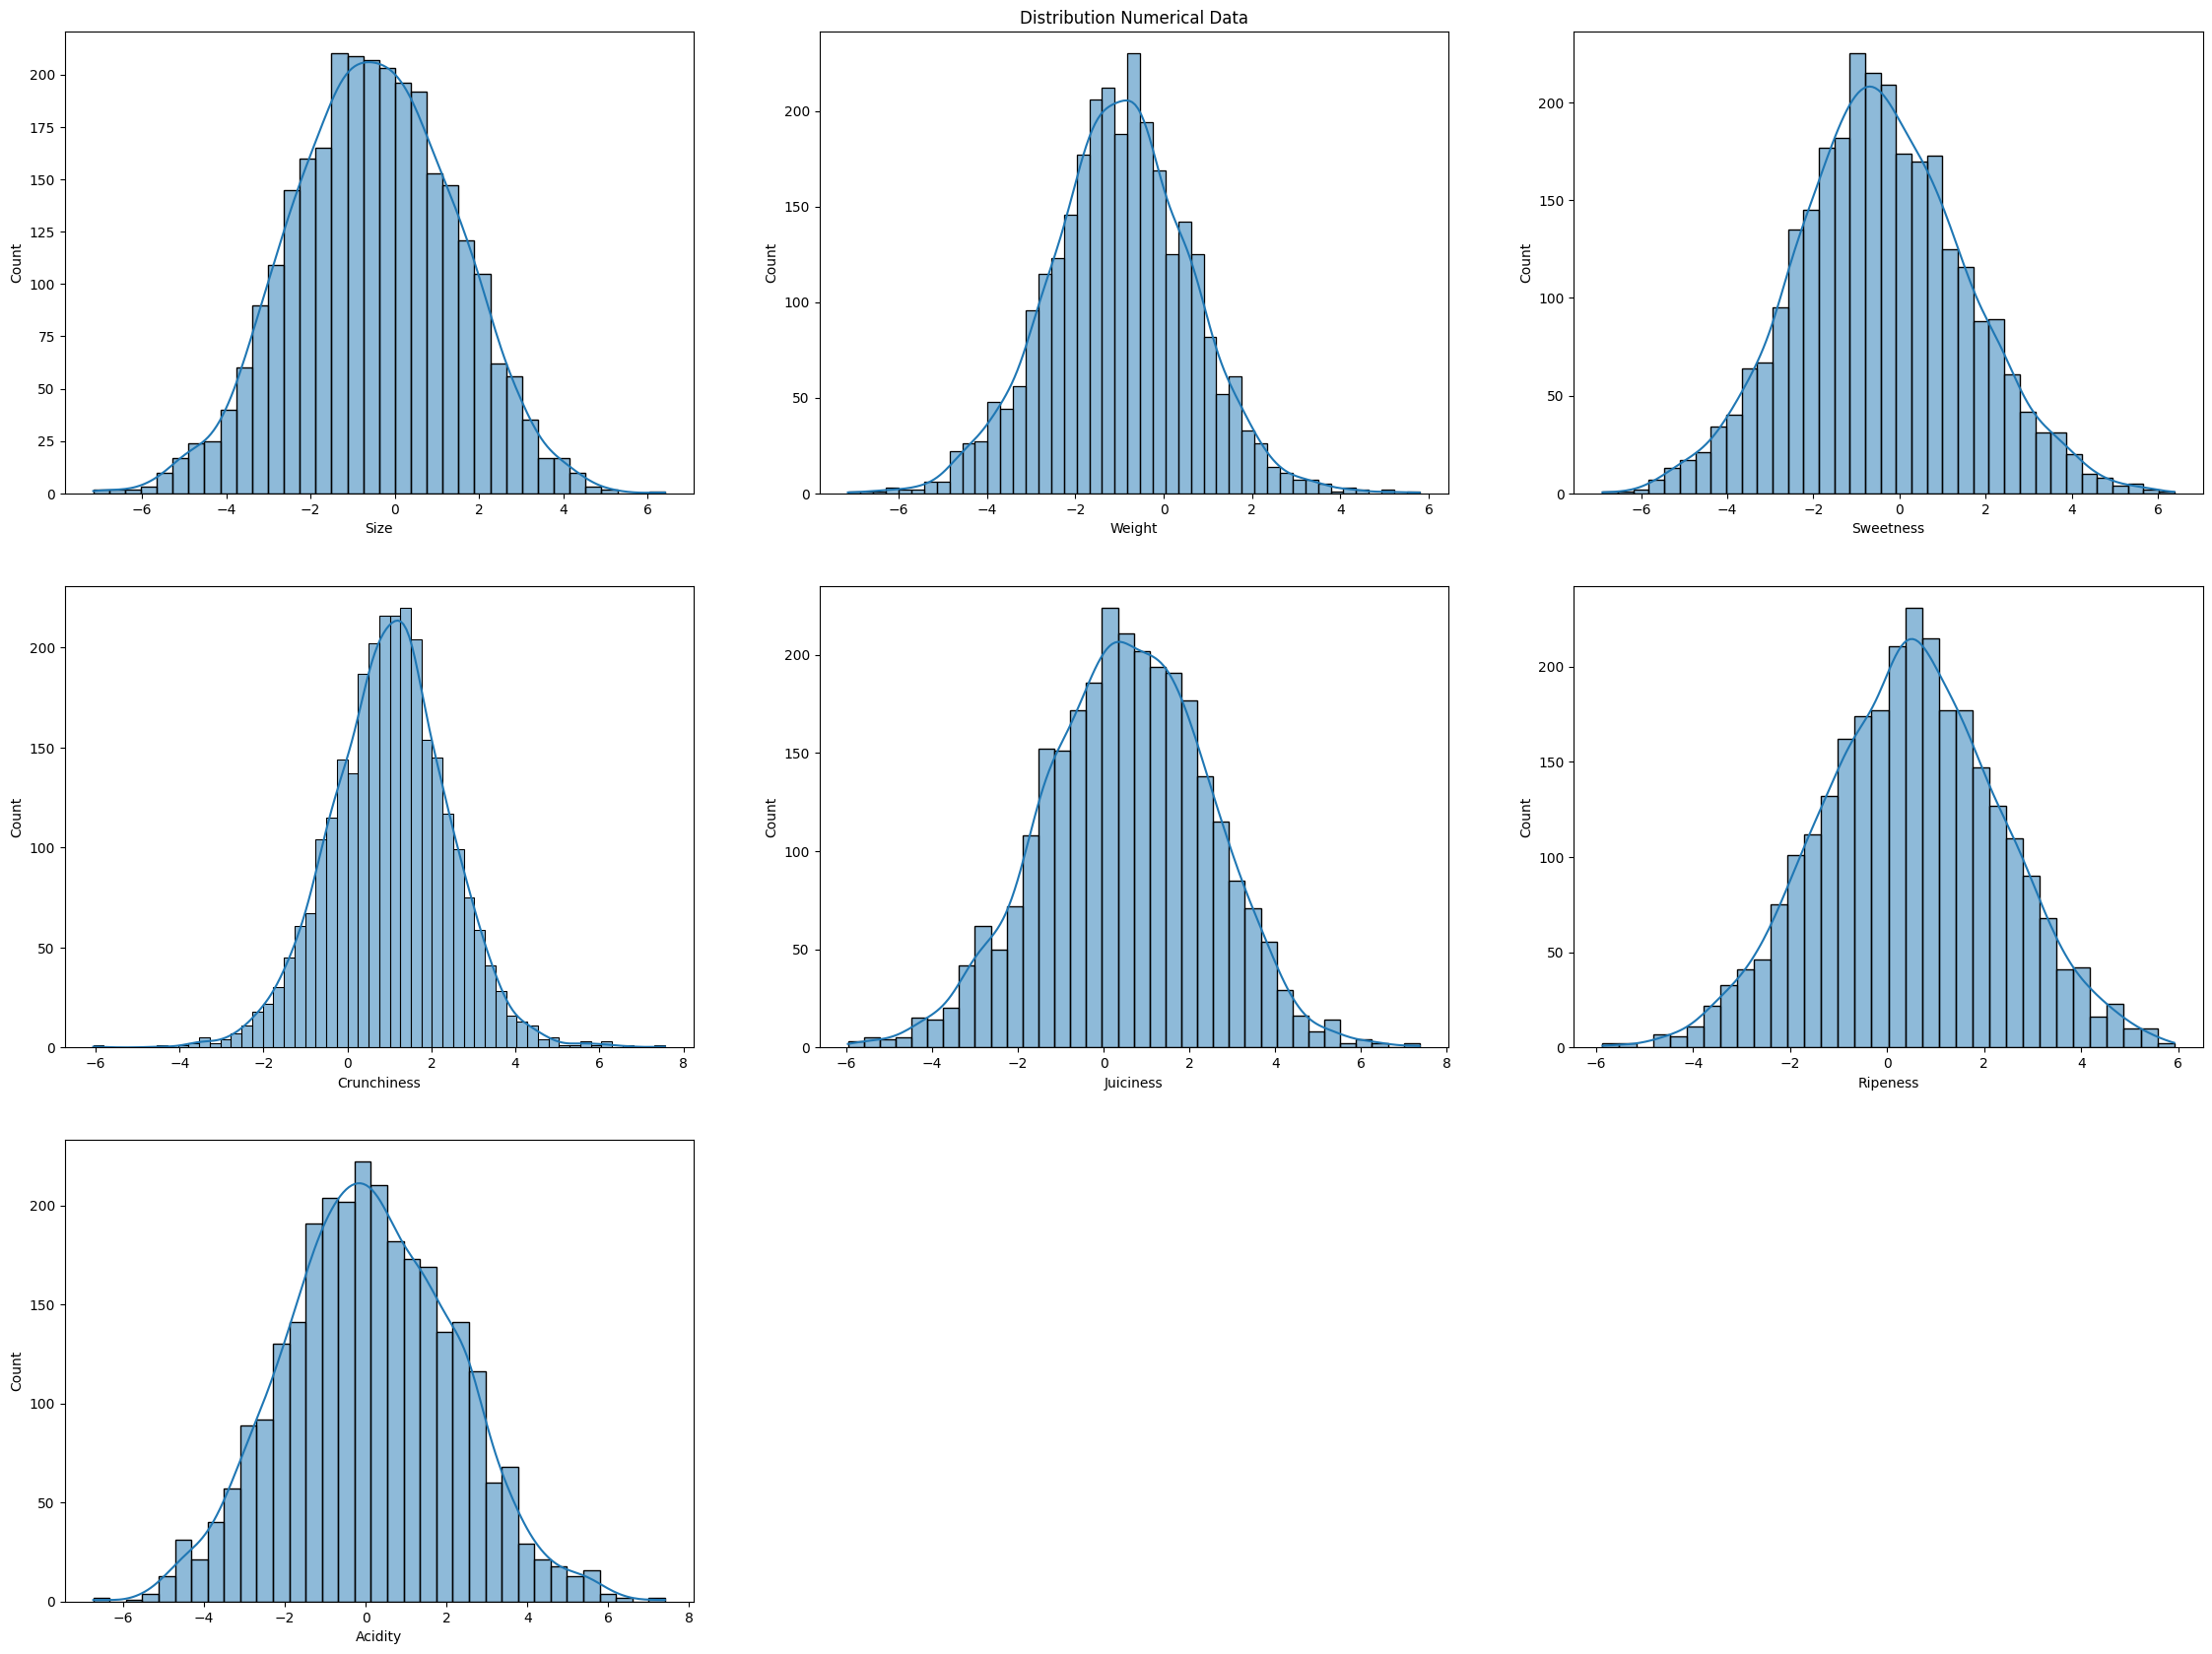

In [ ]:
plt.figure(figsize = (28, 28))
n = 0
for cols in ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']:
    n += 1
    plt.subplot(4 , 3 , n)
    sns.histplot(train[cols], kde=True)
    plt.title('Distribution Numerical Data' if n == 2 else '')
plt.show()

Deskripsi Data (mean, median, standar deviasi, min, max, dan kuartil)

In [ ]:
train.drop(['A_id'], axis=1).describe().astype(int)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,2800,2800,2800,2800,2800,2800,2800
mean,0,0,0,1,0,0,0
std,1,1,1,1,1,1,2
min,-7,-7,-6,-6,-5,-5,-6
25%,-1,-2,-1,0,0,0,-1
50%,0,0,0,1,0,0,0
75%,0,0,0,1,1,1,1
max,6,5,6,7,7,5,7


Tingkat Korelasi Antar Fitur

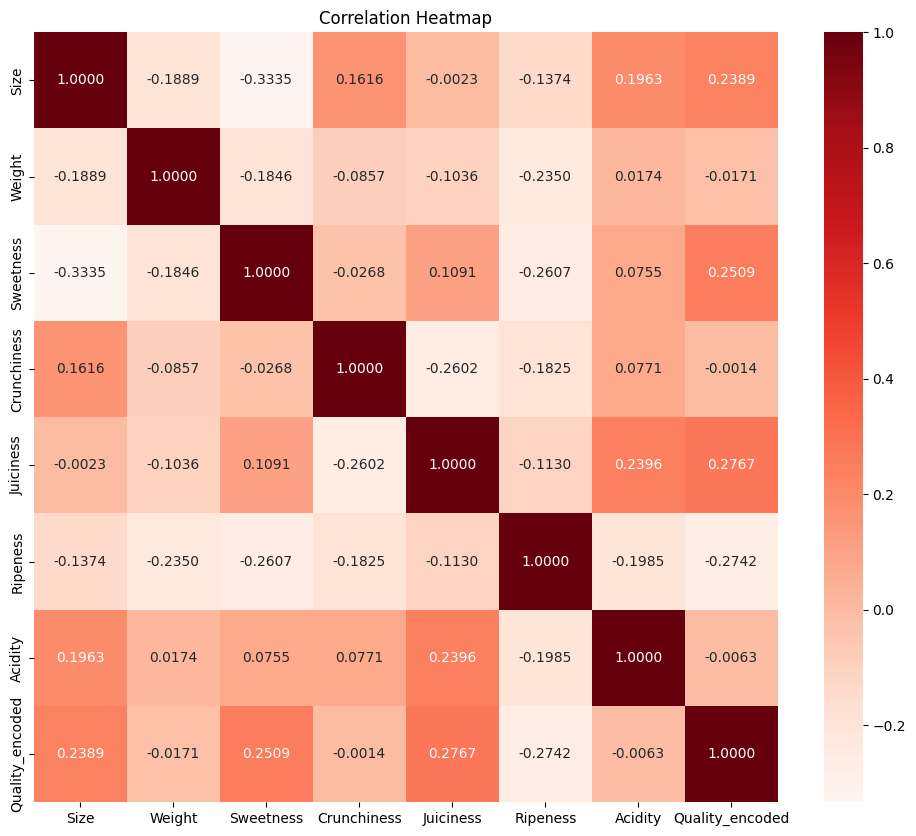

In [ ]:
train_corr = train.copy()

train_corr['Quality_encoded'] = train_corr['Quality'].map({'good': 1, 'bad': 0})

columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality_encoded']

correlation_matrix = train_corr[columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

Tingkat Korelasi Antara Setiap Fitur dengan Quality

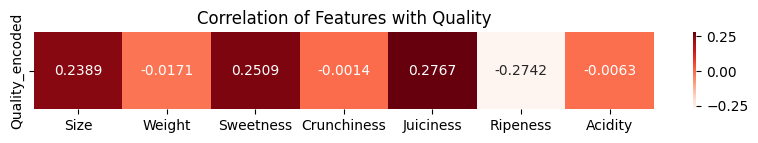

In [ ]:
correlations = correlation_matrix['Quality_encoded'].drop('Quality_encoded')

correlation = correlations.to_frame().transpose()

plt.figure(figsize=(10, 1))
sns.heatmap(correlation, annot=True, fmt='.4f', cmap='Reds')
plt.title('Correlation of Features with Quality')
plt.show()

In [ ]:
correlation_matrix = train_corr[columns].corr()

cor_target = abs(correlation_matrix["Quality_encoded"])
relevant_features = cor_target[cor_target > 0].sort_values(ascending=False)

relevant_features

Quality_encoded    1.000000
Juiciness          0.276665
Ripeness           0.274194
Sweetness          0.250930
Size               0.238940
Weight             0.017088
Acidity            0.006253
Crunchiness        0.001365
Name: Quality_encoded, dtype: float64

### Setelah Outliers Dihilangkan

Distribusi Data Kategorikal

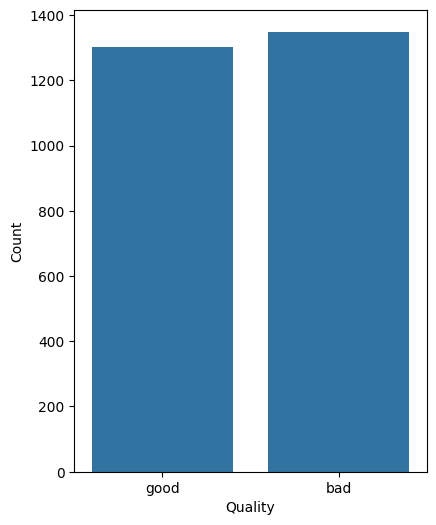

In [ ]:
plt.figure(figsize = (10, 6))
n = 0
for cols in ['Quality']:
    n += 1
    plt.subplot(1 , 2 , n)
    sns.countplot(x=cols, data=train_clean)
    plt.ylabel('Count' if n == 1 else '')
plt.show()

Distribusi Data Numerikal


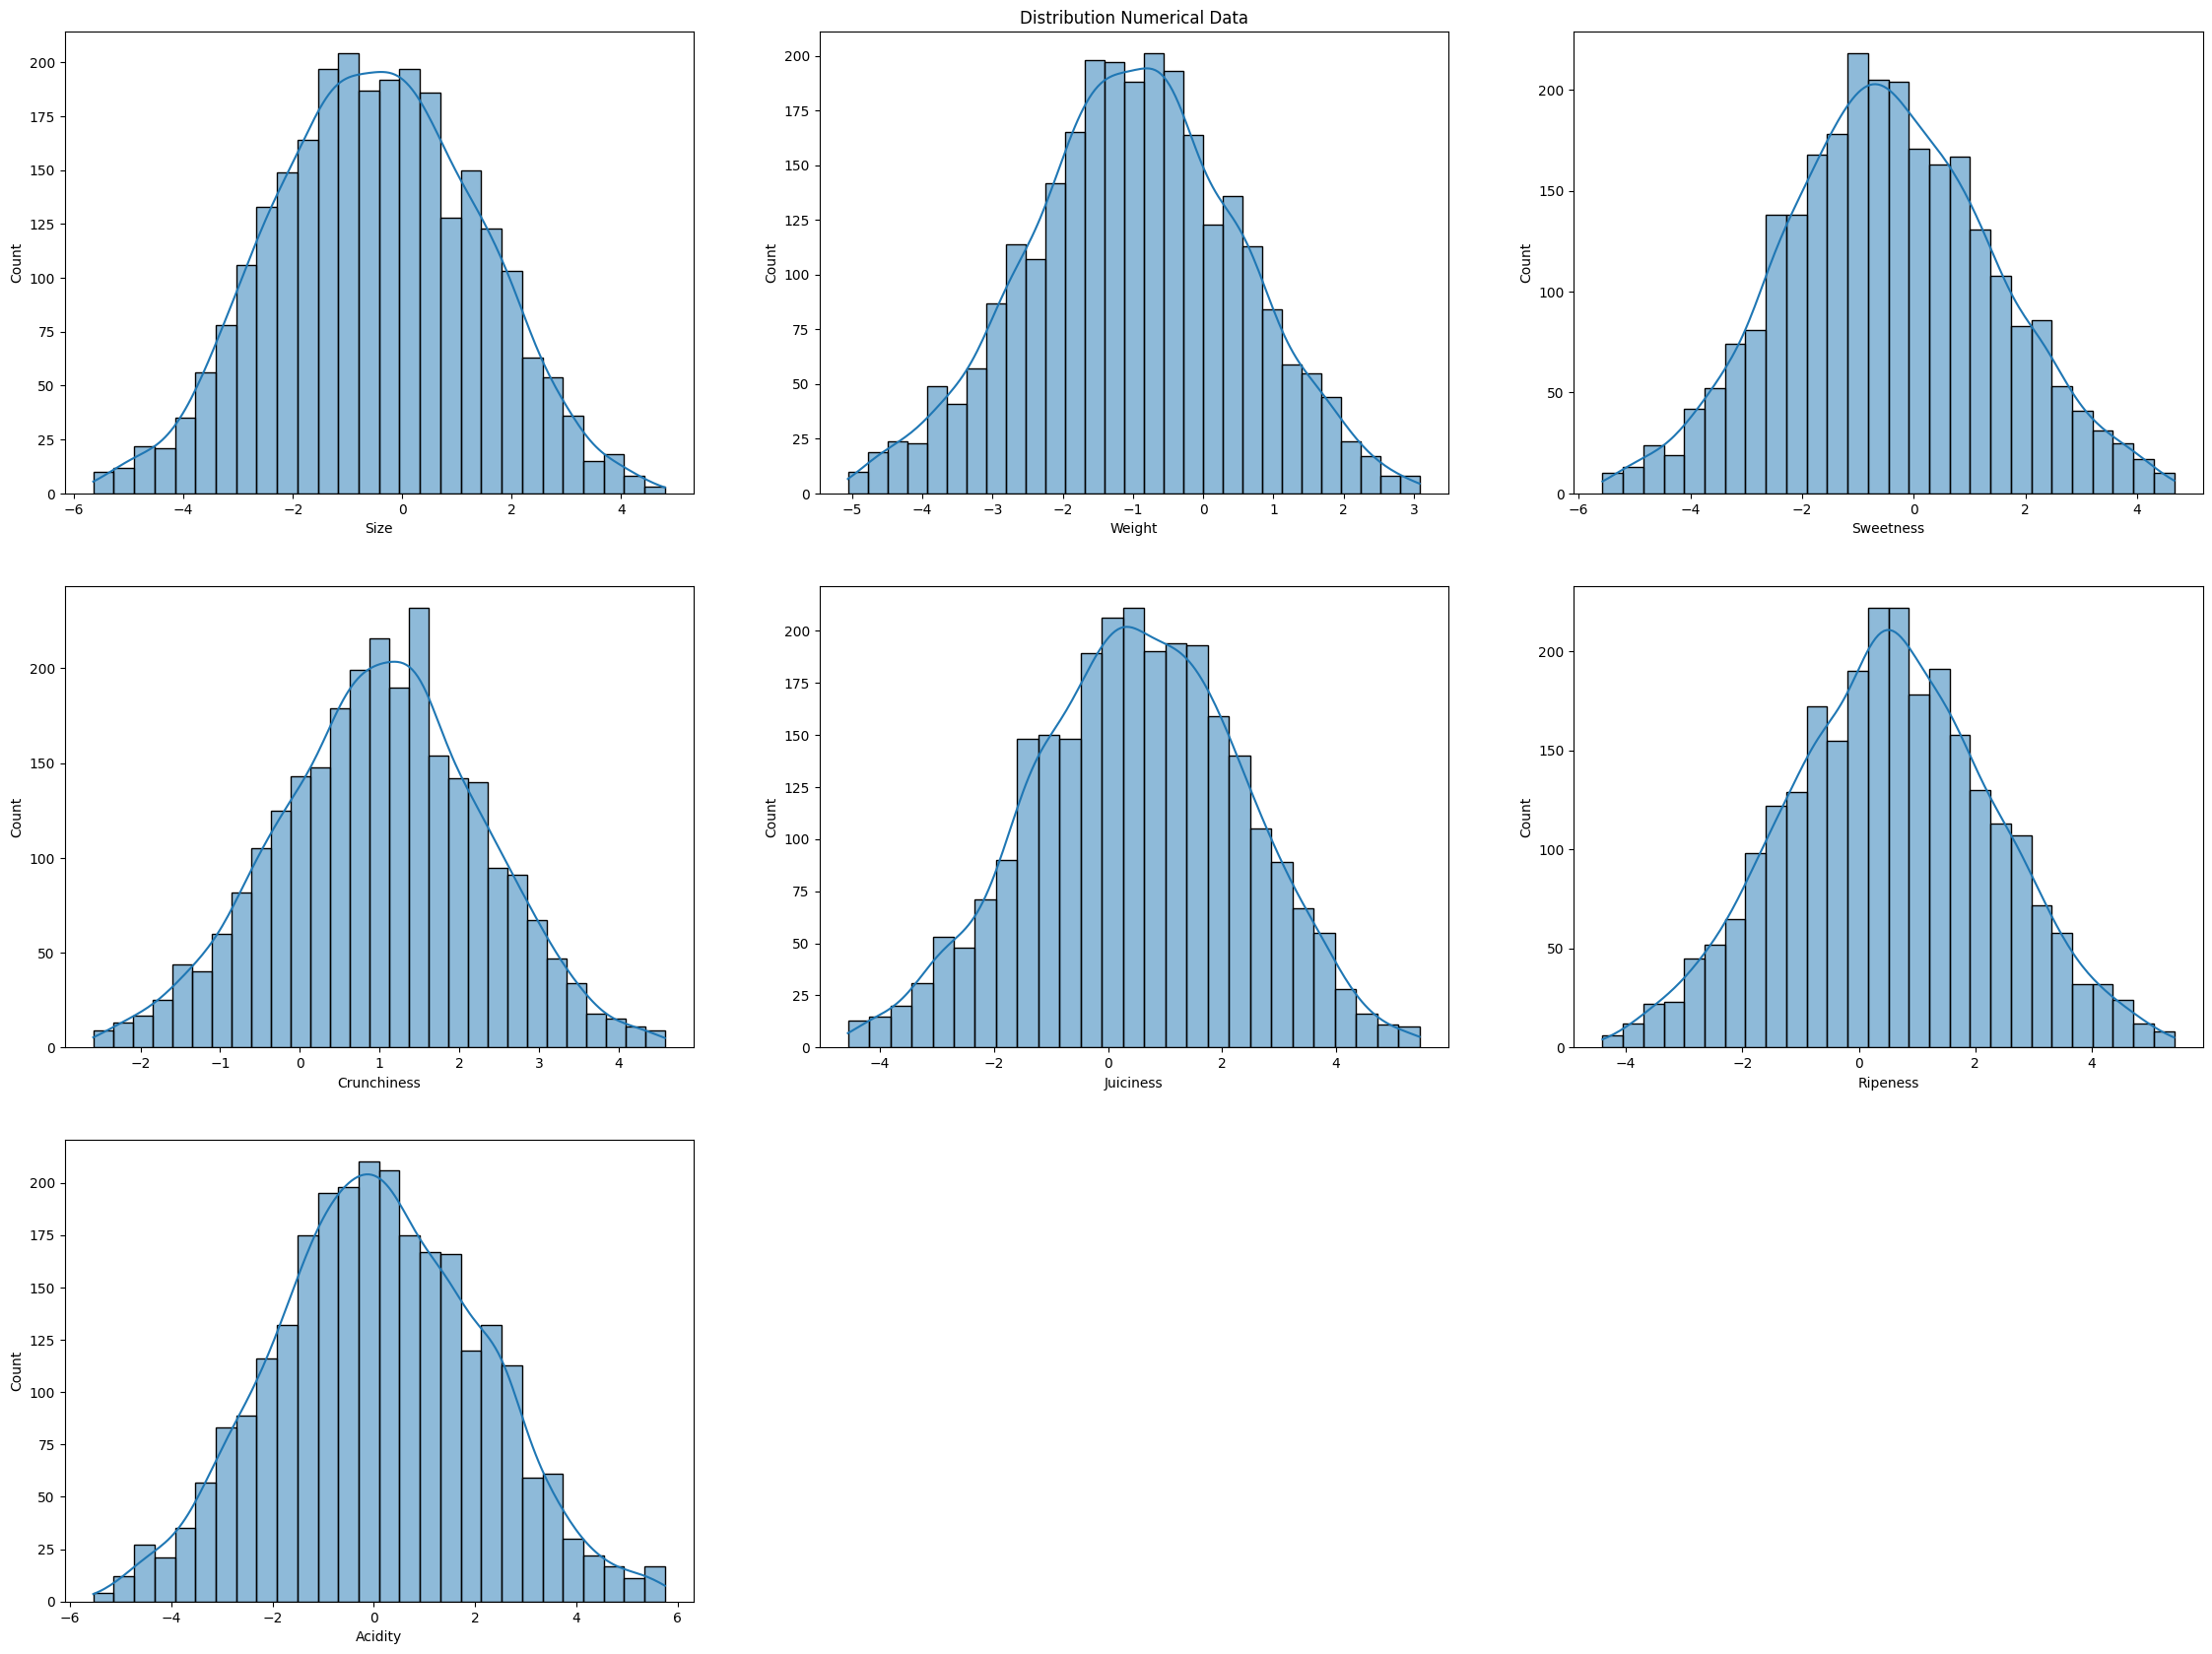

In [ ]:
plt.figure(figsize = (28, 28))
n = 0
for cols in ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']:
    n += 1
    plt.subplot(4 , 3 , n)
    sns.histplot(train_clean[cols], kde=True)
    plt.title('Distribution Numerical Data' if n == 2 else '')
plt.show()

Deskripsi Data (mean, median, standar deviasi, min, max, dan kuartil)

In [ ]:
train_clean.drop(['A_id'], axis=1).describe().astype(int)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,2650,2650,2650,2650,2650,2650,2650
mean,0,-1,0,0,0,0,0
std,1,1,1,1,1,1,2
min,-5,-5,-5,-2,-4,-4,-5
25%,-1,-1,-1,0,0,0,-1
50%,0,0,0,1,0,0,0
75%,0,0,0,1,1,1,1
max,4,3,4,4,5,5,5


Tingkat Korelasi Antar Fitur

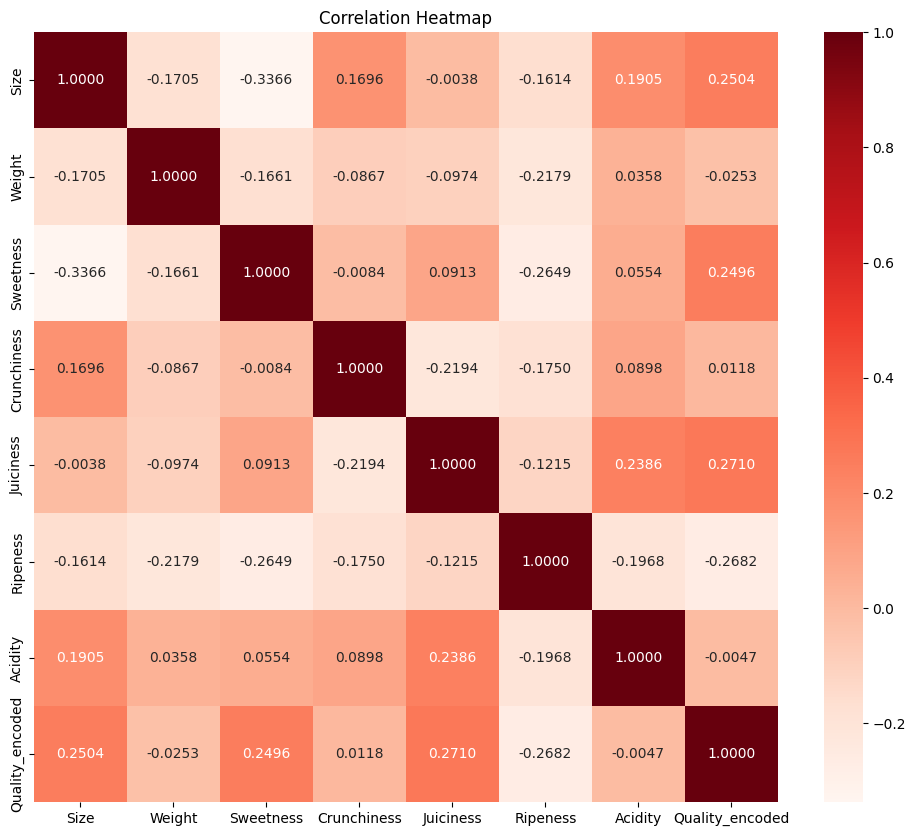

In [ ]:
train_clean_corr = train_clean.copy()

train_clean_corr['Quality_encoded'] = train_clean_corr['Quality'].map({'good': 1, 'bad': 0})

columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality_encoded']

correlation_matrix = train_clean_corr[columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

Tingkat Korelasi Antara Setiap Fitur dengan Quality

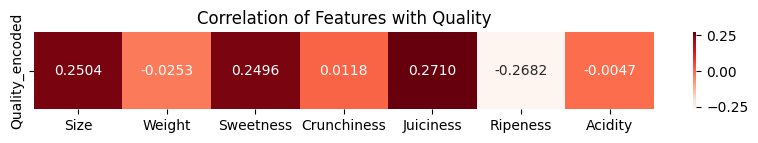

In [ ]:
correlations = correlation_matrix['Quality_encoded'].drop('Quality_encoded')

correlation = correlations.to_frame().transpose()

plt.figure(figsize=(10, 1))
sns.heatmap(correlation, annot=True, fmt='.4f', cmap='Reds')
plt.title('Correlation of Features with Quality')
plt.show()

In [ ]:
cor_target = abs(correlation_matrix["Quality_encoded"])
relevant_features = cor_target[cor_target > 0].sort_values(ascending=False)

relevant_features

Quality_encoded    1.000000
Juiciness          0.270995
Ripeness           0.268217
Size               0.250441
Sweetness          0.249615
Weight             0.025327
Crunchiness        0.011768
Acidity            0.004747
Name: Quality_encoded, dtype: float64

## 5. Pembuatan Model

* StandardScaler: Digunakan untuk menstandarisasi data numerikal agar memiliki mean = 0 dan standar deviasi = 1, sehingga data lebih mudah diproses oleh model neural network.

* LabelEncoder: Digunakan untuk mengonversi fitur kategorikal menjadi angka sehingga bisa diterima oleh model. Contohnya, fitur Quality diubah menjadi nilai numerik yang bisa digunakan sebagai target fitur.

* train_test_split: Digunakan untuk membagi dataset menjadi data training dan data validasi. Data training digunakan untuk melatih model, sementara data validasi digunakan untuk menilai performa model pada data yang tidak pernah dilihat selama training.

* Komponen dalam Pembuatan Neural Network:

1. Sequential: Digunakan untuk mendefinisikan model neural network berurutan.
2. Dense: Layer fully connected dalam neural network.
3. Dropout: Teknik regularisasi untuk mencegah overfitting dengan secara acak mengabaikan beberapa unit selama training.
4. BatchNormalization: Digunakan untuk menormalkan output dari layer sebelumnya, meningkatkan stabilitas dan kecepatan training.
5. Activation: Fungsi aktivasi yang diterapkan pada output layer (misalnya, ReLU, sigmoid).
6. Input: Digunakan untuk menentukan bentuk input data ke neural network.
7. Adam: Optimizer dalam neural network yang menggabungkan kelebihan dari algoritma optimisasi AdaGrad dan RMSProp.

* EarlyStopping: Callback yang digunakan untuk menghentikan proses training jika metrik validasi (seperti val_loss) tidak mengalami perbaikan setelah sejumlah epoch tertentu, untuk mencegah overfitting.

* L1 dan L2 Regularizer: Teknik regularisasi yang digunakan untuk mencegah overfitting. L1 (Lasso) menambahkan penalti absolut terhadap bobot, sedangkan L2 (Ridge) menambahkan penalti kuadrat terhadap bobot.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2

Untuk model saya menggunakan neural network, karna neural network mempunyai kemampuan predictive yang sangat bagus.

In [ ]:
X = train_clean.drop(['A_id', 'Quality'], axis=1)
y = train_clean['Quality']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    Dense(1, activation='sigmoid')
])

model.compile(Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=125, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=250,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5984 - loss: 0.7121 - val_accuracy: 0.7302 - val_loss: 0.6021
Epoch 2/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.5807 - val_accuracy: 0.7566 - val_loss: 0.5273
Epoch 3/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7748 - loss: 0.5088 - val_accuracy: 0.7811 - val_loss: 0.4798
Epoch 4/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7881 - loss: 0.4735 - val_accuracy: 0.8208 - val_loss: 0.4485
Epoch 5/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8368 - loss: 0.4233 - val_accuracy: 0.8038 - val_loss: 0.4342
Epoch 6/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8308 - loss: 0.4269 - val_accuracy: 0.8132 - val_loss: 0.4324
Epoch 7/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8298 - loss: 0.4169 - val_accuracy: 0.8208 - val_loss: 0.4201
Epoch 8/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8420 - loss: 0.3994 - val_accuracy: 0.8245 - val_loss: 0.3

Semua pengaturan yang saya gunakan, seperti jumlah layer, tingkat regularisasi L1 dan L2, dropout rate, learning rate, dan jumlah epoch, telah saya testing dengan berbagai variasi sehingga menemukan pengaturan yang menghasilkan akurasi yang tinggi.

## 6. Evaluasi Model

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Train Accuracy: 0.9792
Validation Accuracy: 0.9679


## 7. Prediksi Kualitas Apel & File Submisi

Pastikan format file hasil prediksi sesuai dengan `sample_submission.csv` dan file submisi disimpan dengan nama `submission.csv`. Pastikan pula variabel `Quality` memiliki nilai bertipe string (`good` atau `bad`)

In [ ]:
url_test = "https://raw.githubusercontent.com/Obay13579/Project-DSC/main/test.csv"
test = pd.read_csv(url_test)
X_test = test.drop('A_id', axis=1)
X_test_scaled = scaler.transform(X_test)

predictions = model.predict(X_test_scaled)
prediction_labels = ['good' if pred > 0.5 else 'bad' for pred in predictions]

submission = pd.DataFrame({'A_id': test['A_id'], 'Quality': prediction_labels})
submission.to_csv('submission.csv', index=False)

submission.head()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,A_id,Quality
0,2800,bad
1,2801,bad
2,2802,bad
3,2803,bad
4,2804,good


## 8. Kesimpulan dan Saran

Kesimpulan :

* Model yang dikembangkan mampu memprediksi kualitas apel dengan tingkat akurasi yang memadai, berdasarkan atribut-atribut fisik dan kimiawi yang tersedia. Penghapusan outlier menggunakan metode IQR membantu meningkatkan kualitas data dan akurasi model.
* Dari analisis korelasi, ditemukan bahwa beberapa atribut seperti ukuran, kematangan, kadar air, dan rasa manis memiliki korelasi yang signifikan terhadap kualitas apel, menunjukkan bahwa atribut-atribut ini penting dalam penentuan kualitas.

Saran :
1. Pengumpulan Data yang Lebih Luas: Untuk meningkatkan akurasi dan representativitas model, disarankan untuk mengumpulkan data dari berbagai sumber dan kondisi yang lebih bervariasi. Ini dapat mencakup berbagai varietas apel, kondisi pertumbuhan, dan penanganan pasca panen.
2. Validasi Model Lebih Lanjut: Sebelum model digunakan secara luas, lakukan validasi lebih lanjut menggunakan data yang tidak pernah digunakan dalam pelatihan untuk memastikan model tetap akurat dan generalisasi dengan baik pada data yang belum pernah terlihat.
3. Peningkatan Fitur: Menambahkan fitur-fitur tambahan yang mungkin relevan untuk meningkatkan prediksi kualitas, seperti kondisi cuaca, waktu panen, dan metode penyimpanan. Ini dapat memberikan informasi tambahan yang berguna untuk memperbaiki model.